<a href="https://colab.research.google.com/github/vu211fa18067/Machine-Learning/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**▪ Apply the following tasks to any given dataset:

a. Load and visualize data

b. Check out and replace missing values

c. Encode the Categorical data

d. Splitting the dataset into Training and Test set

e. Splitting the dataset into k-folds

f. Feature scaling**

In [2]:
import pandas as pd
import numpy as np

In [5]:
# A) Load Data
df = pd.read_csv('/content/Dataset.csv')
print(df)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


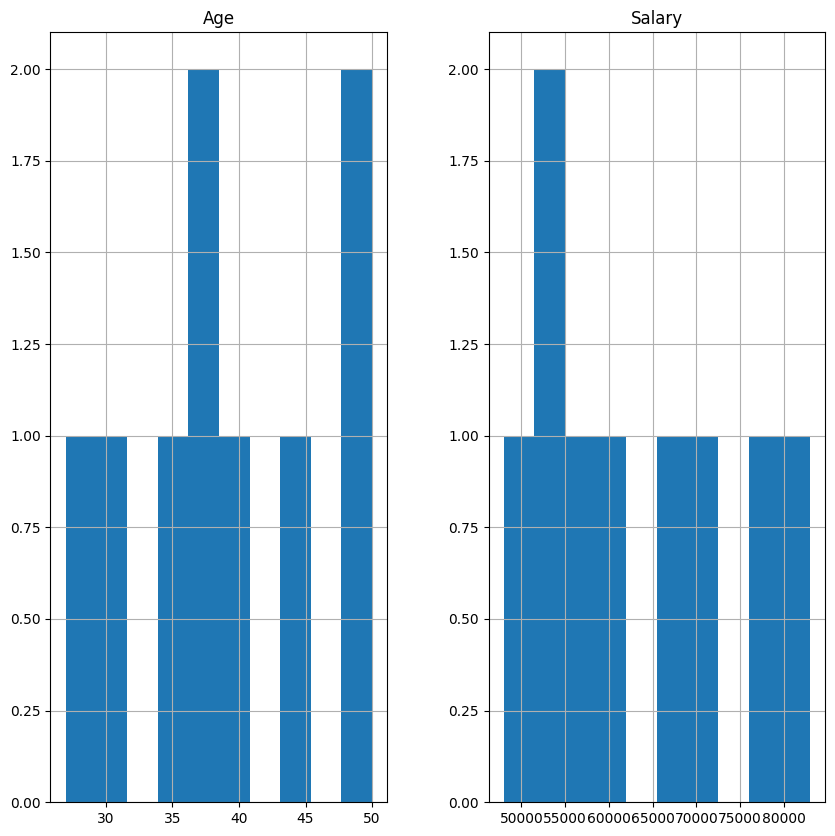

In [6]:
# A) Visualize
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()

In [8]:
# B) Handle Missing Values(NaN and Empty Values are removed)
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
print(df)

   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


In [10]:
# C) Encode the Categorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
print(df['Country'])

0    0
1    2
2    1
3    2
4    1
5    0
6    2
7    0
8    1
9    0
Name: Country, dtype: int64


In [13]:
# D) Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #80%of data Used for Traing ,20% of data Used for Testing

In [14]:
# E)  Splitting the dataset into k-folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_ktrain, X_ktest = X.iloc[train_index], X.iloc[test_index]
    y_ktrain, y_ktest = y.iloc[train_index], y.iloc[test_index]

In [17]:
# F) Feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
print(X_train_scaled)
print('---------------------------------------------')
print(X_test_scaled)

[[ 1.50755672 -1.61081561 -1.60053077]
 [-0.90453403  1.64963044  1.74126968]
 [-0.90453403 -0.05822225  0.4476695 ]
 [ 1.50755672  0.09703708 -0.19913058]
 [ 0.30151134 -1.1450376  -0.95373068]
 [ 0.30151134  0.40755576  0.1003139 ]
 [-0.90453403  1.0285931   0.98666958]
 [-0.90453403 -0.36874092 -0.52253063]]
---------------------------------------------
[[ 0.30151134  1.96014912  2.17246973]
 [ 1.50755672  0.21779435 -1.16933071]]
